In [1]:
from strawberryfields.apps import data, sample, subgraph, plot
import plotly
import networkx as nx

# Generate the Random Graph 

In [116]:
def get_clustered_graph():
    import random 
    G = nx.union(nx.union(nx.erdos_renyi_graph(8, 0.85), nx.erdos_renyi_graph(8, 0.85), rename=('G0-', 'G1-')), nx.union(nx.erdos_renyi_graph(8, 0.85), nx.erdos_renyi_graph(8, 0.85), rename=('G2-', 'G3-')))

    nodes = list(G.nodes())

    count = 0
    while count < 10:
        i = random.randint(0, len(nodes)-1)
        j = random.randint(0, len(nodes)-1)

        if i != j and not (nodes[i], nodes[j]) in G.edges:
            G.add_edge(nodes[i], nodes[j])
            count += 1

    # adding random weight to edges:
    for e in G.edges:
        G[e[0]][e[1]]['weight'] = random.random()
        if e[0][:2] != e[1][:2]:
            G[e[0]][e[1]]['weight'] += 1
            G[e[0]][e[1]]['weight'] *= 100

        G[e[0]][e[1]]['inverse_weight'] = 1/G[e[0]][e[1]]['weight']

    return G

    # total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)

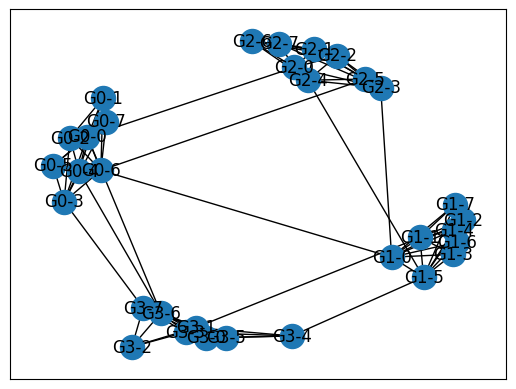

In [117]:
G = get_clustered_graph()
total_pos = nx.spring_layout(G, pos=nx.spectral_layout(G), weight='inverse_weight', k=2)
nx.draw_networkx(G, pos = total_pos)

In [126]:

graph_array = nx.to_numpy_array(G)
samples = sample.sample(graph_array, 3, n_samples = 10)

/home/harshit/.local/lib/python3.10/site-packages/thewalrus/samples.py:367: ComplexWarning: Casting complex values to real discards the imaginary part
/home/harshit/.local/lib/python3.10/site-packages/thewalrus/samples.py:370: ComplexWarning: Casting complex values to real discards the imaginary part


In [127]:
print(len(samples))
print(samples) 

10
[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


## Generate the subgraphs from the samples

In [139]:
subgraphs = sample.to_subgraphs(samples, G)
quantum_subgraphs = []
for graph in subgraphs:
    if graph:
        quantum_subgraphs.append(G.subgraph(graph))

In [140]:
quantum_subgraphs = quantum_subgraphs[:4]


In [141]:
from qtsp import (
    run_tsp_on_simulator,
    sample_graph_with_weights,
    run_tsp_on_hardware,
    add_missing_edges,
) 

In [142]:
quantum_subgraphs = [add_missing_edges(graph.copy()) for graph in quantum_subgraphs]

[]
[]
[]
[('G2-3', 'G0-6', 10000.0), ('G2-3', 'G3-4', 10000.0), ('G2-3', 'G0-3', 10000.0), ('G2-3', 'G3-7', 10000.0), ('G2-3', 'G1-5', 10000.0), ('G0-6', 'G3-7', 10000.0), ('G0-6', 'G3-4', 10000.0), ('G0-6', 'G1-5', 10000.0), ('G3-4', 'G3-7', 10000.0), ('G3-4', 'G0-3', 10000.0), ('G3-4', 'G1-0', 10000.0), ('G1-0', 'G3-7', 10000.0), ('G1-0', 'G0-3', 10000.0), ('G0-3', 'G1-5', 10000.0), ('G3-7', 'G1-5', 10000.0)]


## Using the Quantum TSP for finding routes in sub-graph

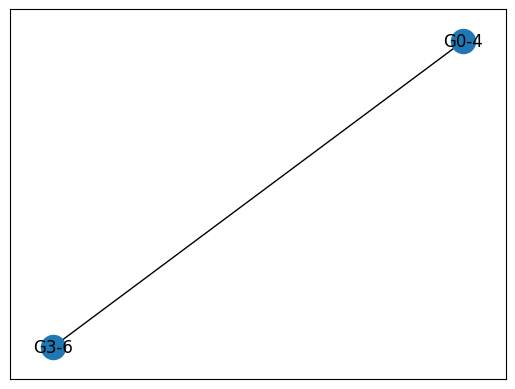

In [143]:
nx.draw_networkx(quantum_subgraphs[1])

In [ ]:
cycles = []
for i, curr_graph in enumerate(quantum_subgraphs):
    print(f"Solving for the subgraph {i}")
    # we need to remap the nodes to meet the requirements of 
    # the qubo formulation 
    
    
    # make maps for the nodes
    forward_mapping , backward_mapping = {}, {}
    for i, node_label in enumerate(list(curr_graph.nodes())):
        forward_mapping[node_label] = i 
        backward_mapping[i] = node_label
    
    # relabel the nodes
    relabelled_graph = nx.relabel_nodes(curr_graph, forward_mapping)
    
    # run on simulator
    node_list, result = run_tsp_on_simulator(relabelled_graph)
    
    # get the final route in terms of original nodes
    route = [backward_mapping[node] for node in node_list]
    route.append(route[0])
    cycles.append(route)
    print(f"Route for given sub-graph : {route}")

Cycle : ['G1-0', 'G4-4', 'G1-0']
Cycle : ['G2-4', 'G4-0', 'G3-5', 'G3-0', 'G2-4']


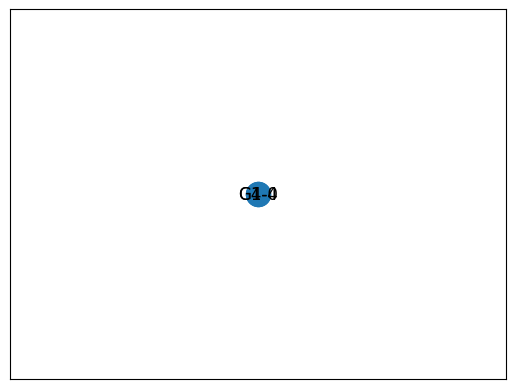

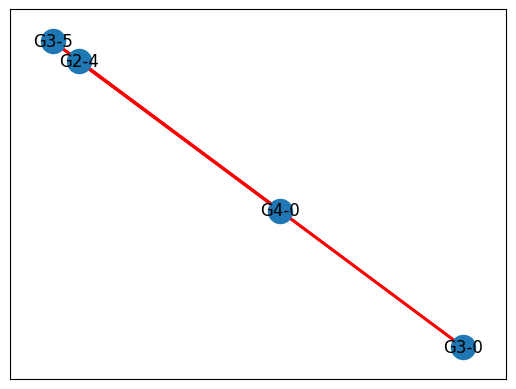

In [ ]:
import matplotlib.pyplot as plt 
for i,G_aux in enumerate(quantum_subgraphs):
  plt.figure(i)
  pos = nx.spring_layout(G_aux, pos=nx.spectral_layout(G_aux))
  cycle = cycles[i]

  _ = nx.draw_networkx(G_aux, pos)
  path_edges = list(zip(cycle,cycle[1:]))
  _ = nx.draw_networkx_edges(G_aux,pos,edgelist=path_edges,edge_color='r', width=2)

  # cost = sum(G[n][nbr]["weight"] for n, nbr in nx.utils.pairwise(cycle))
  print('Cycle :', cycle)


## Construct the intercity graph 
- it is trying to form based on those 4 clusters but NOT the ones which we have detected

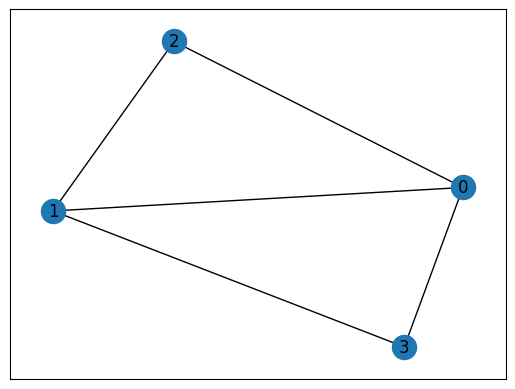

In [145]:
# Construction of the inter-city graph
G_city = nx.Graph()
G_city.add_nodes_from([0, 1, 2, 3])

# edges
edges_to_add = {}
for e in G.edges:
  if e[0][:2] != e[1][:2]:
    if not (int(e[0][1:2]), int(e[1][1:2])) in edges_to_add or edges_to_add[(int(e[0][1:2]), int(e[1][1:2]))]['weight'] > G.get_edge_data(e[0], e[1])['weight']:
      edges_to_add[(int(e[0][1:2]), int(e[1][1:2]))] = {'weight': G.get_edge_data(e[0], e[1])['weight'], 'nodes': e}

for k in edges_to_add:
  nodes = list(G_city.nodes())
  G_city.add_edge(*k)
  G_city[k[0]][k[1]]['weight'] = edges_to_add[k]['weight']

pos = nx.spring_layout(G_city, pos=nx.spectral_layout(G_city))
nx.draw_networkx(G_city, pos=pos)

## TSP in Global graph via Quantum

In [149]:
G_city.nodes 

NodeView((0, 1, 2, 3))

In [150]:
# run on simulator
node_list, result = run_tsp_on_simulator(add_missing_edges(G_city.copy()))

# get the final route in terms of original nodes
inter_city_route = node_list 
inter_city_route.append(inter_city_route[0])

print("Intercity route : ", inter_city_route)

[(2, 3, 10000.0)]
Problem name: TSP

Minimize
  137.37830365208902*x_0_0*x_1_1 + 137.37830365208902*x_0_0*x_1_3
  + 126.38824934231927*x_0_0*x_2_1 + 126.38824934231927*x_0_0*x_2_3
  + 158.8445320588622*x_0_0*x_3_1 + 158.8445320588622*x_0_0*x_3_3
  + 137.37830365208902*x_0_1*x_1_0 + 137.37830365208902*x_0_1*x_1_2
  + 126.38824934231927*x_0_1*x_2_0 + 126.38824934231927*x_0_1*x_2_2
  + 158.8445320588622*x_0_1*x_3_0 + 158.8445320588622*x_0_1*x_3_2
  + 137.37830365208902*x_0_2*x_1_1 + 137.37830365208902*x_0_2*x_1_3
  + 126.38824934231927*x_0_2*x_2_1 + 126.38824934231927*x_0_2*x_2_3
  + 158.8445320588622*x_0_2*x_3_1 + 158.8445320588622*x_0_2*x_3_3
  + 137.37830365208902*x_0_3*x_1_0 + 137.37830365208902*x_0_3*x_1_2
  + 126.38824934231927*x_0_3*x_2_0 + 126.38824934231927*x_0_3*x_2_2
  + 158.8445320588622*x_0_3*x_3_0 + 158.8445320588622*x_0_3*x_3_2
  + 126.74760106043104*x_1_0*x_2_1 + 126.74760106043104*x_1_0*x_2_3
  + 102.61262405129013*x_1_0*x_3_1 + 102.61262405129013*x_1_0*x_3_3
  + 126.7476

## Reconstructing the whole cycle after quantum TSP

In [157]:
def find_city(G_list, node):
    for i,G in enumerate(G_list):
        if node in list(G.nodes()):
            return i
    return -1

def shift(seq, n):
    return seq[n:]+seq[:n]


def find_neighbours(cycle, node):
        # print(node, cycle)
    index = cycle.index(node)
    n1 = cycle[index-1]
    n2 = cycle[index+1] if index+1 < len(cycle) else cycle[0]

    return n1, n2


def cycle_to_path_cost(G, neighbour, comm_node_1, comm_node_2):
    if (neighbour, comm_node_1) in G.edges():
        return nx.dijkstra_path_length(G, comm_node_2, neighbour) - G[neighbour][comm_node_1]['weight']
    else:
        return nx.dijkstra_path_length(G, comm_node_2, neighbour) - G[comm_node_1][neighbour]['weight']


In [155]:
cycle_edges = []

for i in range(len(cycles)-1):
  src_node = min([cycles[i], cycles[i+1]])
  dst_node = max([cycles[i], cycles[i+1]])
  cycle_edges.append(edges_to_add[(src_node, dst_node)]['nodes'])
  if cycles[i] > cycles[i+1]:
    cycle_edges[-1] = cycle_edges[-1][::-1]

TypeError: unhashable type: 'list'

In [156]:
edges_to_add

{(0, 2): {'weight': 126.38824934231927, 'nodes': ('G0-6', 'G2-5')},
 (0, 3): {'weight': 158.8445320588622, 'nodes': ('G0-0', 'G3-6')},
 (0, 1): {'weight': 137.37830365208902, 'nodes': ('G0-6', 'G1-0')},
 (1, 2): {'weight': 126.74760106043104, 'nodes': ('G1-5', 'G2-4')},
 (1, 3): {'weight': 102.61262405129013, 'nodes': ('G1-5', 'G3-4')}}